# Performing Gradient Decent in Regression

In [1]:
# Import required libraries
import numpy as np
import math 
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Prepare Dataset
data = np.random.rand(500,2) # 500 rows and 2 columns
print(data[5])

# Initiliaze the weights and bias
theta = np.zeros(2)
print(theta)

[0.01546705 0.96424419]
[0. 0.]


In [9]:
# Defining the Loss Function
def loss_function(data,theta):
    global mse
    # Initiliaze the weights and bias
    m = theta[0]
    b = theta[1]
    loss = 0
    # Iterate through all observations
    for i in range(0,len(data)):
        x = data[i,0]
        y = data[i,1]
        # predict the value of y_hat
        y_hat = (m*x) + b
        # Calculate the Loss (MSE)
        loss = loss + ((y - (y_hat)) ** 2)
    mse = loss / float(len(data))
    return mse
    
loss_function(data,theta)
print(mse)

# Calculate the Gradients of Loss function
def compute_gradients(data,theta):
    global gradients
    gradients = np.zeros(2)
    N = len(data)
    m = theta[0]
    b = theta[1]
    
    for i in range(0,len(data)):
        x = data[i,0]
        y = data[i,1]
        
        # Gradients of loss with respect to m
        gradients[0] += -(2/N) * x * (y - ((m*x) + b))
        #Gradients of loss with respect to b
        gradients[1] += -(2/N) * (y - ((theta[0] + x) + b))
        
    epsilon = 1e-6
    gradients = np.divide(gradients, N+epsilon)
        
    return gradients
    
compute_gradients(data,theta)

0.28892757952035414


array([-0.00081836,  0.00042387])

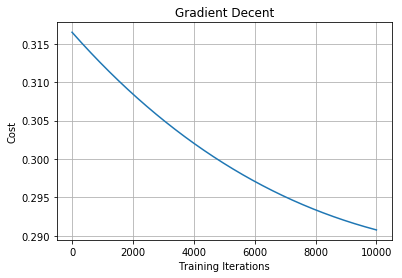

In [12]:
# Updating Model parameters
num_iterations = 10000
lr = 1e-2
loss = []
theta = np.zeros(2)
for t in range(num_iterations):
    # Compute Gradients
    compute_gradients(data,theta)
    
    # Update the Model parameters
    theta = theta - (lr*gradients)
    
    # Compute the Loss
    loss.append(loss_function(data,theta))
  
plt.plot(loss)
plt.grid()
plt.xlabel("Training Iterations")
plt.ylabel("Cost")
plt.title("Gradient Decent")
plt.show()